<br> <font size=7 color=#009999> <b> Tâche 7 - XRD </b> <br><br>

<font size=6 color=#009999> <br> Imports <br> <br>

In [1]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator

<font size=6 color=#009999> <br> Téléchargement du fichier CIF du matériau mp-867168 ($Sr_2SbAu$) <br> <br>

In [2]:
with MPRester("V4zgRFcb4T97MTrH") as m:
    structure = m.get_structure_by_material_id("mp-867168")

<font size=6 color=#009999> <br> Diffractogramme <br> <br>

<font size=5 color=#009999> <br> 1. Création du module 'XRD Pattern Calculator' <br> <br>

La diffraction par rayon X (X-Ray diffraction analysis, XRD) est une technique qui permet de trouver la structure christallographique d'un matériau. 
On trouve ici les raies du diffractogramme du $Sr_2SbAu$ sous un rayonnement incident de $CuKa$ de longeur d'onde $\lambda =1.54060 \overset{\circ}{A}$.

In [3]:
xrd = XRDCalculator(wavelength='CuKa')

<font size=5 color=#009999> <br> 2. Calcul du diffractogramme pour la structure de $Ar_2SbAu$ <br> <br>

On crée un structure 'pattern' qui contient les éléments qui décrivent le diffractogramme. Les données des trois premiers pics sont donnés ci dessous.

In [4]:
pattern = xrd.get_pattern(structure)
hkl = pattern.hkls
intensities = pattern.y
angles = pattern.x

for i in [0,1,2]:
    print("Pic ", i+1, "\n")
    print("     Angle [degrés] : ", angles[i], "\n")
    print("     Intensité relative: ", intensities[i], "\n")
    for index in hkl[i]:
        print("     Indice hkl : ", index.get('hkl'), "\n")

Pic  1 

     Angle [degrés] :  19.371913960122395 

     Intensité relative:  4.907939227927916 

     Indice hkl :  (1, 0, 0) 

     Indice hkl :  (1, 1, 1) 

Pic  2 

     Angle [degrés] :  22.40484238136619 

     Intensité relative:  9.624668716109964 

     Indice hkl :  (1, 1, 0) 

Pic  3 

     Angle [degrés] :  31.89393200531361 

     Intensité relative:  100.0 

     Indice hkl :  (1, 0, -1) 

     Indice hkl :  (2, 1, 1) 



<font size=5 color=#009999> <br> 3. Schéma du diffractogramme <br> <br>

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

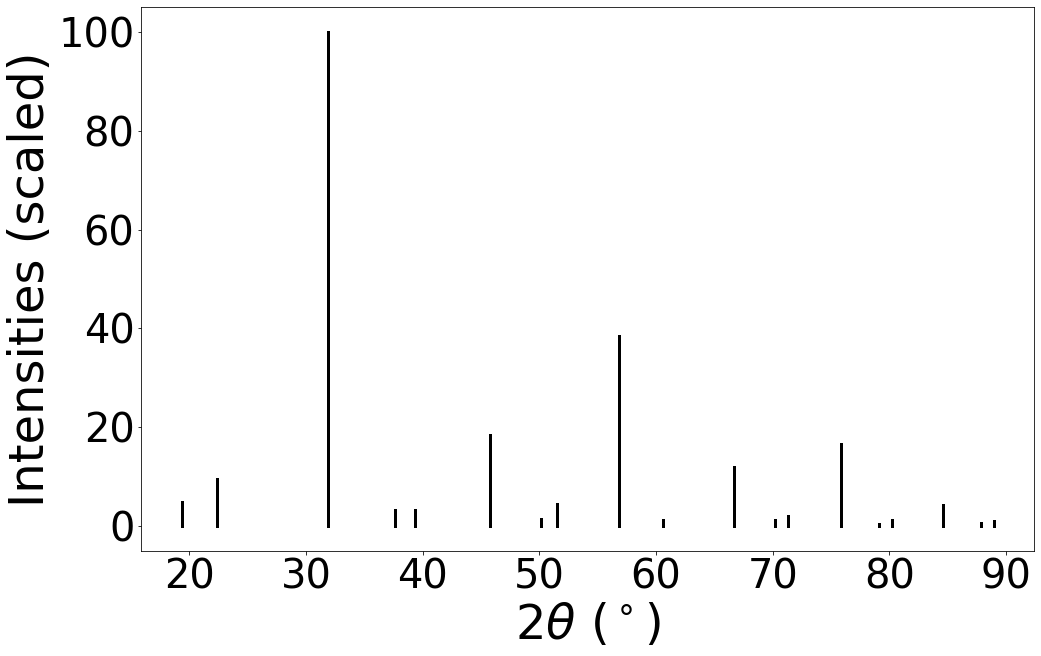

In [5]:
xrd.get_plot(structure, annotate_peaks=False)

On y observe bien les trois premiers pics décrits ci dessus en $2\theta = 19.37^\circ$, $2\theta = 22.40^\circ$ et $2\theta = 31.89^\circ$ avec les intensités relatives et indices $hkl$ tels qu'indiquées.